In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.test.gpu_device_name())

2.7.0
/device:GPU:0


## Generate data

In [3]:
def f_sgmm2011(t, Q, t0, f0):
	A = ((8*np.pi*f0**2)/(Q**2))**(1./4)
	cos_arg = 2 * np.pi * f0 * (t - t0)
	exp_arg = - ((2*np.pi*f0) / Q)**2 * (t - t0)**2
	signal = A * np.exp(exp_arg) * np.cos(cos_arg)
	return signal


In [ ]:
fs= 512
tmax= 50
bounds= [
    ['Q', 10, 100],
    ['t0', 10, 40],
    ['f0', 5, 50]
]


t = np.linspace(0,tmax,fs*tmax)
Q = np.random.uniform(10,100)
t0 = np.random.uniform(10,40)
f0 = np.random.uniform(5,50)



In [ ]:
signal = f_sgmm2011(t,Q,t0,f0)

(23.0, 28.0)

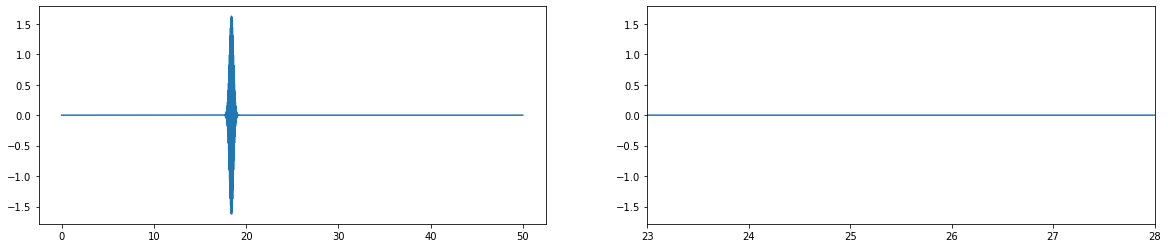

In [ ]:
fig, axes = plt.subplots(1,2,figsize =(20,4))

axes[0].plot(t,signal)
axes[1].plot(t,signal)
axes[1].set_xlim(23,28)

(25.0, 30.0)

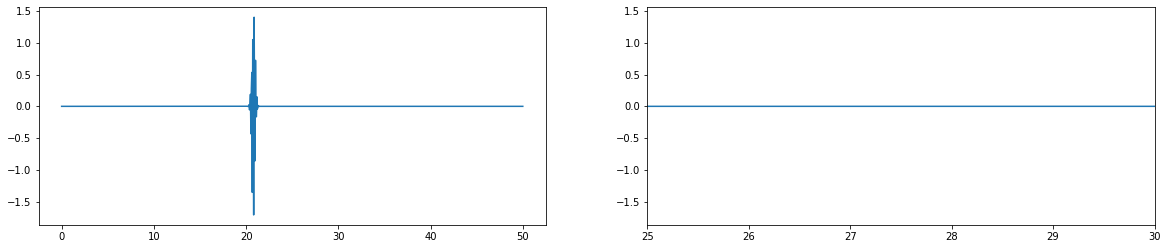

In [ ]:
t = np.linspace(0,tmax,1000)
Q = np.random.uniform(10,100)
t0 = np.random.uniform(10,40)
f0 = np.random.uniform(5,50)

signal = f_sgmm2011(t,Q,t0,f0)

fig, axes = plt.subplots(1,2,figsize =(20,4))

axes[0].plot(t,signal)
axes[1].plot(t,signal)
axes[1].set_xlim(25,30)

## Generate dataset

In [ ]:
training_size = 10000 # I used that much data to avoid overfitting
val_size = 2000
test_size = 2000

In [ ]:
train_sample = []
train_target = []
t = np.linspace(0,tmax,fs*tmax)

for i in range (training_size):
  
  Q = np.random.uniform(10,100)
  t0 = np.random.uniform(10,40)
  f0 = np.random.uniform(5,50)

  train_sample.append(f_sgmm2011(t,Q,t0,f0))
  train_target.append(((Q-10)/90,(t0-10)/30,(f0-5)/45)) # Make all data between 0 and 1. #((Q-10)/90,(t0-10)/30,(f0-5)/45)

print(np.array(train_sample).shape)
print(np.array(train_target).shape)

(10000, 25600)
(10000, 3)


In [ ]:
val_sample = []
val_target = []
t = np.linspace(0,tmax,fs*tmax)

for i in range (val_size):
  
  Q = np.random.uniform(10,100)
  t0 = np.random.uniform(10,40)
  f0 = np.random.uniform(5,50)

  val_sample.append(f_sgmm2011(t,Q,t0,f0))
  val_target.append(((Q-10)/90,(t0-10)/30,(f0-5)/45)) # Make all data between 0 and 1. #(Q-10)/90,(t0-10)/30,(f0-5)/45)


print(np.array(val_sample).shape)
print(np.array(val_target).shape)

(2000, 25600)
(2000, 3)


In [ ]:
test_sample = []
test_target = []
t = np.linspace(0,tmax,fs*tmax)

for i in range (test_size):
  
  Q = np.random.uniform(10,100)
  t0 = np.random.uniform(10,40)
  f0 = np.random.uniform(5,50)

  test_sample.append(f_sgmm2011(t,Q,t0,f0))
  test_target.append(((Q-10)/90,(t0-10)/30,(f0-5)/45)) # Make all data between 0 and 1. # ((Q-10)/90,(t0-10)/30,(f0-5)/45)

print(np.array(test_sample).shape)
print(np.array(test_target).shape)

(2000, 25600)
(2000, 3)


#### Visualize training data target

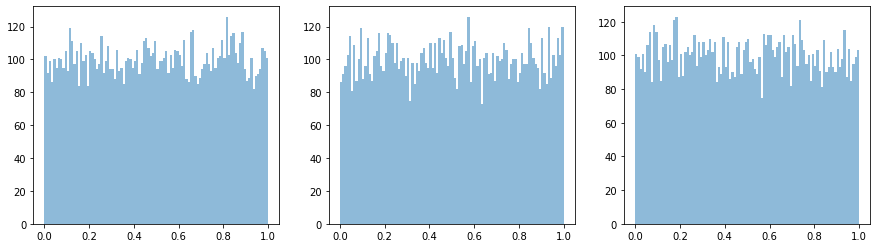

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

_ = axes[0].hist(np.array(train_target)[:,0], bins = 100, alpha = 0.5)
_ = axes[1].hist(np.array(train_target)[:,1], bins = 100, alpha = 0.5)
_ = axes[2].hist(np.array(train_target)[:,2], bins = 100, alpha = 0.5)


## Create network

In [ ]:
from tensorflow.keras.layers import Input, Dense, PReLU, BatchNormalization, Conv1D, Flatten, LSTM
from tensorflow.keras.models import Model

import tensorflow_probability as tfp
tfd = tfp.distributions

In [ ]:
N_STEPS = np.array(train_sample).shape[0]
print(np.array(train_sample).shape)
N_FEATURES = np.array(train_sample).shape[1]

encoded_size = 2
prior = tfd.Independent(tfd.Normal(loc=tf.zeros(encoded_size), scale=1),
                        reinterpreted_batch_ndims=1)


input_layer = Input(shape=(tmax*fs,)) 

h = BatchNormalization()(input_layer)
h = LSTM(50, activation='relu', input_shape=(N_STEPS, 1))(h)
h = Flatten()(h)
#h = PReLU()(h)
#h = Dense(2096)(h)
#h = PReLU()(h)
#h = Dense(1024)(h)
#h = PReLU()(h)
#h = Dense(512)(h)
#h = PReLU()(h)
#h = Dense(256)(h)
#h = PReLU()(h)


#h = Conv1D(16, kernel_size = 500)(tf.expand_dims(h, axis = -1))
#h = PReLU()(h)
#h = Conv1D(32, kernel_size = 200)(h)
#h = PReLU()(h)
#h = Conv1D(64, kernel_size = 100)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 80)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 50)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 40)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 20)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 10)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 5)(h)
#h = PReLU()(h)
#h = Conv1D(128, kernel_size = 3)(h)
#h = PReLU()(h)
#h = Flatten()(h)

h = Dense(256)(h)
h = PReLU()(h)
h = Dense(128)(h)
h = PReLU()(h)
h = Dense(64)(h)
#h = PReLU()(h)
#h = Dense(32)(h)
#h = PReLU()(h)

#h = Dense(2)(h)
h = Dense(tfp.layers.MultivariateNormalTriL.params_size(3))(h)
h = tfp.layers.MultivariateNormalTriL(3)(h)#,activity_regularizer=tfp.layers.KLDivergenceRegularizer(prior, weight=0.5)


model = Model(input_layer,h)

NameError: ignored

In [1]:
model.summary()

NameError: ignored

In [ ]:
loss = lambda x, rv_x: -rv_x.log_prob(x)
#loss = tf.keras.losses.MeanSquaredError()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4), 
              loss=loss , metrics = ['mse', 'acc'], experimental_run_tf_function=False)

## Train model

In [ ]:
model.load_weights('drive/MyDrive/model_gw_weights/cp-dense-larger.ckpt')#cp-{epoch:04d}.ckpt')

In [ ]:
batch_size = 256

hist = model.fit(np.array(train_sample),np.array(train_target), epochs=100, 
          steps_per_epoch=int(len(train_sample)/batch_size),
          verbose=1,
          shuffle=True,
          validation_data=(np.array(val_sample),np.array(val_target)),
          validation_steps=int(len(val_sample)/batch_size),
          workers=0,
          use_multiprocessing = True)

Epoch 1/100
39/39 [==============================] - 5s 64ms/step - loss: 12.4427 - mse: 3.9839 - acc: 0.3351 - val_loss: 2.9214 - val_mse: 1.0077 - val_acc: 0.3495
Epoch 2/100
39/39 [==============================] - 1s 36ms/step - loss: 4.6810 - mse: 4.3017 - acc: 0.3402 - val_loss: 2.9396 - val_mse: 1.0471 - val_acc: 0.3435
Epoch 3/100
39/39 [==============================] - 1s 36ms/step - loss: 4.3512 - mse: 3.9286 - acc: 0.3405 - val_loss: 2.9271 - val_mse: 1.0757 - val_acc: 0.3275
Epoch 4/100
39/39 [==============================] - 1s 36ms/step - loss: 4.1137 - mse: 3.5225 - acc: 0.3479 - val_loss: 2.8993 - val_mse: 1.0419 - val_acc: 0.3400
Epoch 5/100
39/39 [==============================] - 1s 35ms/step - loss: 3.8617 - mse: 2.9272 - acc: 0.3450 - val_loss: 2.8586 - val_mse: 1.0351 - val_acc: 0.3285
Epoch 6/100
39/39 [==============================] - 1s 35ms/step - loss: 3.6300 - mse: 2.5496 - acc: 0.3518 - val_loss: 2.8023 - val_mse: 1.0360 - val_acc: 0.3490
Epoch 7/100
39/

KeyboardInterrupt: ignored

In [ ]:
model.save_weights('drive/MyDrive/model_gw_weights/cp-dense-larger.ckpt')

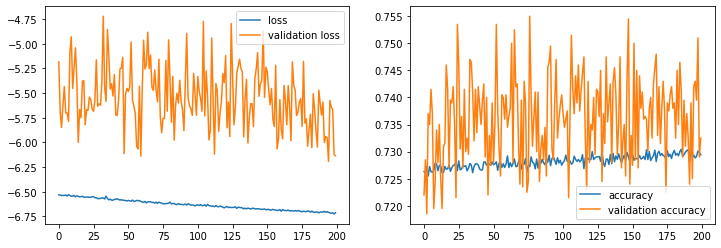

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].plot(hist.history["loss"], label = 'loss')
axes[0].plot(hist.history["val_loss"], label = 'validation loss')
axes[0].legend()

axes[1].plot(hist.history["acc"], label = 'accuracy')
axes[1].plot(hist.history["val_acc"], label = 'validation accuracy')
axes[1].legend()

## Quick test

In [ ]:
pred = model([np.array(test_sample)])

pred_array = pred.mean().numpy()
pred_std = pred.stddev().numpy()
print(pred_array.shape)

(2000, 3)


Text(0.5, 1.0, 'f0')

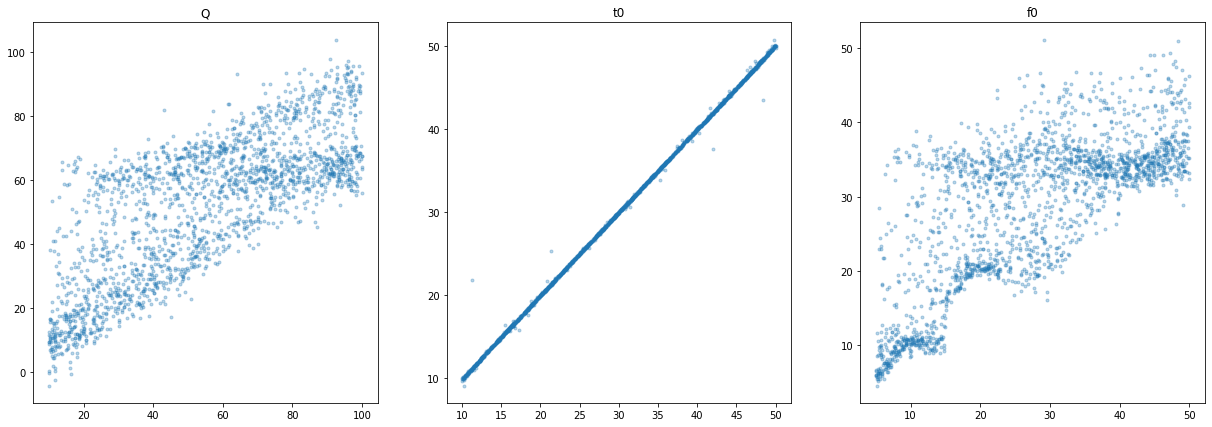

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (21,7))
axes[0].plot((np.array(test_target)[:,0]*90)+10, pred_array[:,0]*90+10, '.', alpha = 0.3)
axes[0].set_title('Q')
axes[1].plot((np.array(test_target)[:,1]*40)+10, pred_array[:,1]*40+10, '.', alpha = 0.3)
axes[1].set_title('t0')
axes[2].plot((np.array(test_target)[:,2]*45)+5, pred_array[:,2]*45+5, '.', alpha = 0.3)
axes[2].set_title('f0')

Text(0.5, 1.0, 'f0')

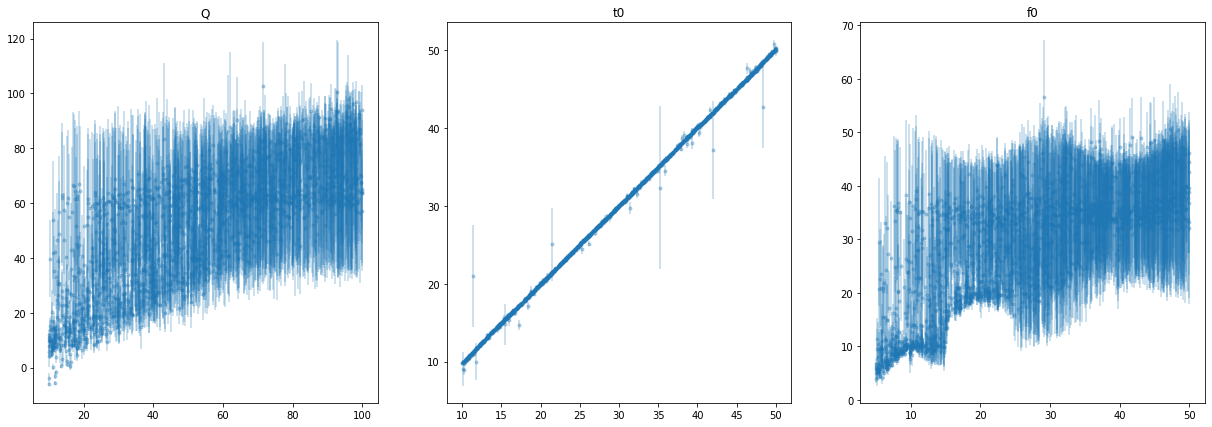

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (21,7))
axes[0].errorbar((np.array(test_target)[:,0]*90)+10, pred_array[:,0]*90+10, yerr = pred_std[:,0]*90 , fmt='.', alpha = 0.3)
axes[0].set_title('Q')
axes[1].errorbar((np.array(test_target)[:,1]*40)+10, pred_array[:,1]*40+10, yerr = pred_std[:,1]*40, fmt='.', alpha = 0.3)
axes[1].set_title('t0')
axes[2].errorbar((np.array(test_target)[:,2]*45)+5, pred_array[:,2]*45+5, yerr = pred_std[:,2]*45, fmt='.', alpha = 0.3)
axes[2].set_title('f0')

## See results on training data (overfitting ?)

In [ ]:
pred = model([np.array(train_sample)[:2000]])

pred_array = pred.mean().numpy()
pred_std = pred.stddev().numpy()
print(pred_array.shape)

(2000, 3)


Text(0.5, 1.0, 'f0')

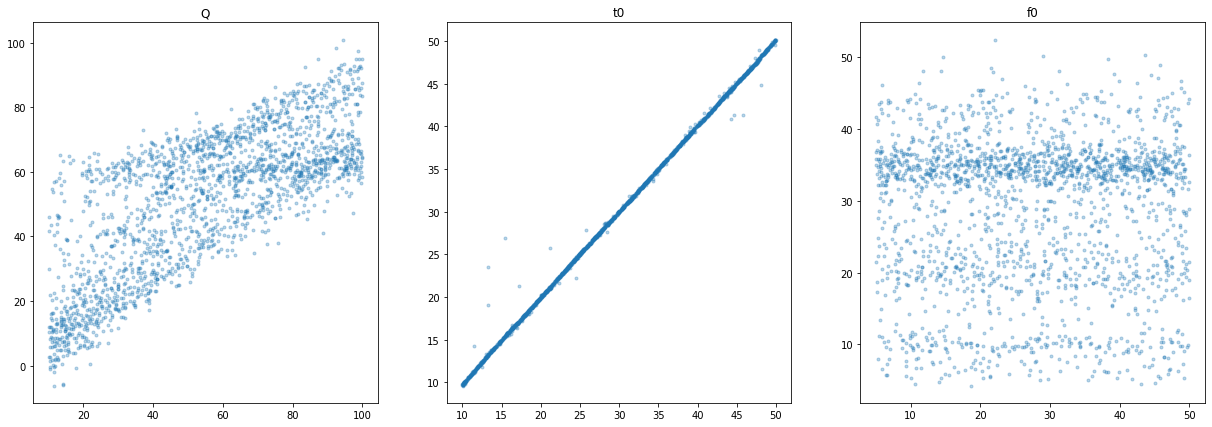

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (21,7))
axes[0].plot((np.array(train_target)[:2000,0]*90)+10, pred_array[:,0]*90+10, '.', alpha = 0.3)
axes[0].set_title('Q')
axes[1].plot((np.array(train_target)[:2000,1]*40)+10, pred_array[:,1]*40+10, '.', alpha = 0.3)
axes[1].set_title('t0')
axes[2].plot((np.array(test_target)[:2000,2]*45)+5, pred_array[:,2]*45+5, '.', alpha = 0.3)
axes[2].set_title('f0')

Text(0.5, 1.0, 'f0')

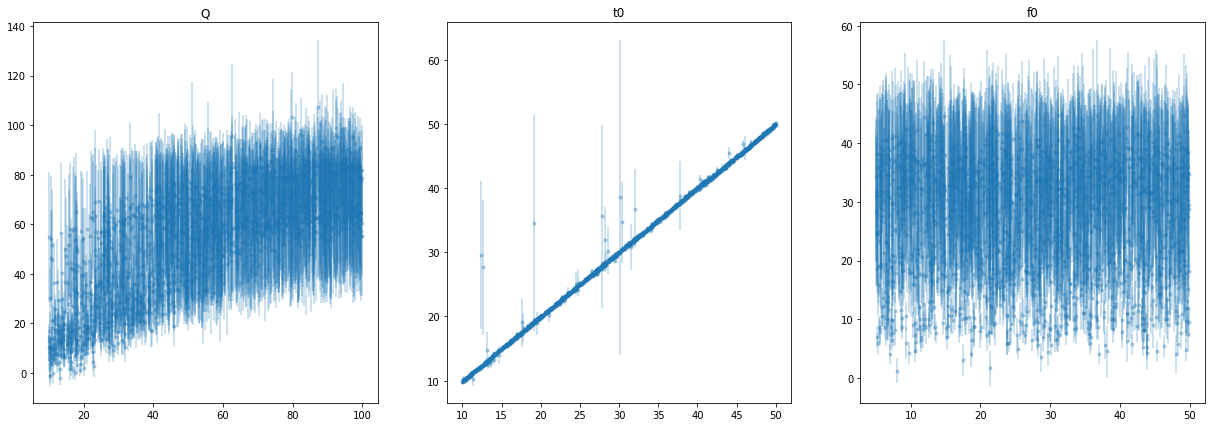

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (21,7))
axes[0].errorbar((np.array(train_target)[:2000,0]*90)+10, pred_array[:,0]*90+10, yerr = pred_std[:,0]*90 , fmt='.', alpha = 0.3)
axes[0].set_title('Q')
axes[1].errorbar((np.array(train_target)[:2000,1]*40)+10, pred_array[:,1]*40+10, yerr = pred_std[:,1]*40, fmt='.', alpha = 0.3)
axes[1].set_title('t0')
axes[2].errorbar((np.array(test_target)[:2000,2]*45)+5, pred_array[:,2]*45+5, yerr = pred_std[:,2]*45, fmt='.', alpha = 0.3)
axes[2].set_title('f0')